In [1]:
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Clean and prepare the data

In [2]:
df=pd.read_csv('Data/Fake_Real_News_Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [3]:
# Increase column width
pd.set_option('display.max_colwidth', None)
df.duplicated().sum()

0

In [4]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

title  \
0     A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone   
1  In Baltimore's call for federal police probe, a new search for answers (+video)   
2             Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It   
3               Inside the Trump-Bush melodrama: Decades of tension and discomfort   
4                                    Shutdown clash to return in force by December   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1):

    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm", disable=disable)

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

In [6]:
# batch preprocess the text and store tokens
df['tokens'] = batch_preprocess_texts(df['text'], 
                                           remove_stopwords=False,
                                           remove_punct=False,
                                           disable=["ner",'parser'])
df.head()

6335it [04:24, 23.96it/s] 


title  \
0     A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone   
1  In Baltimore's call for federal police probe, a new search for answers (+video)   
2             Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It   
3               Inside the Trump-Bush melodrama: Decades of tension and discomfort   
4                                    Shutdown clash to return in force by December   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [7]:
# batch preprocess the text and store lemmas
df['lemmas'] = batch_preprocess_texts(df['text'], 
                                           remove_stopwords=True,
                                           remove_punct=True,
                                      use_lemmas=True, batch_size=5,
                                           disable=["ner",'parser'])
df.head()

6335it [04:02, 26.15it/s]


title  \
0     A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone   
1  In Baltimore's call for federal police probe, a new search for answers (+video)   
2             Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It   
3               Inside the Trump-Bush melodrama: Decades of tension and discomfort   
4                                    Shutdown clash to return in force by December   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [8]:
import joblib
## creating a dictionary of the whole dataframe
export = {'df':df }
# saving the export dict as a joblib file
joblib.dump(export, 'Data/Fake_Real_News_Data.joblib')

['Data/Fake_Real_News_Data.joblib']

In [9]:
#  loading it back in and check if the cell stores list
loaded = joblib.load('Data/Fake_Real_News_Data.joblib')
df = loaded['df']
type(df.loc[3,'lemmas'])

list

In [10]:
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['lemmas'].apply(lambda x: " ".join(x))
df.head()

title  \
0     A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone   
1  In Baltimore's call for federal police probe, a new search for answers (+video)   
2             Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It   
3               Inside the Trump-Bush melodrama: Decades of tension and discomfort   
4                                    Shutdown clash to return in force by December   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [11]:
# # remove $ marks that lead to the body change
df['lemmas-joined'] = df['lemmas-joined'].str.replace('$','',regex=False)
df.loc[3,'lemmas-joined']

'donald trump spend day january 2014 hobnob politician trump international golf club west palm beach fla. billionaire mogul tout legalize gambling state rep. steve crisafulli speaker florida house wire florida republicans plug property potential site casino tap putt manicure green trump mind jeb bush trash jeb honestly think hold jeb high regard say crisafulli bush supporter say uncomfortable conversation defend florida governor trump meet mr. trump occasion constantly thing jeb negative connotation jeb trump jeering day harbinger taunt derision 2016 gop runner direct bush campaign trail summer feud lead republicans escalate recent day shape define dynamic early stage race consider trump dominant status poll bush fundraising ability tension likely factor week month come candidate attempt topple way nomination 2016 campaign late manifestation decade discord trump bush family gild 1980 trump george h.w. bush rise force respective sphere relationship trump bushes melodrama veer display pu

# Analyze class balance and document lengths

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6335 non-null   object
 1   text           6335 non-null   object
 2   label          6335 non-null   object
 3   tokens         6335 non-null   object
 4   lemmas         6335 non-null   object
 5   lemmas-joined  6335 non-null   object
dtypes: object(6)
memory usage: 297.1+ KB


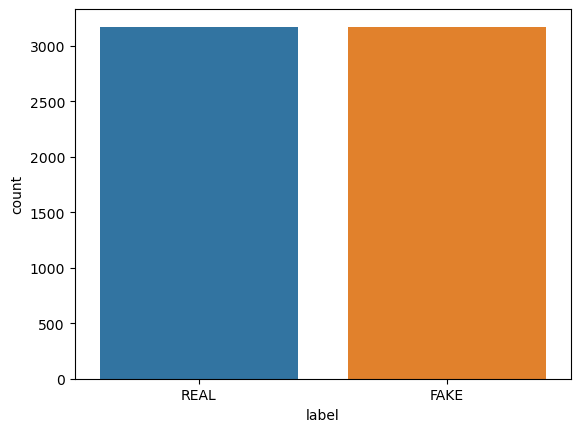

In [13]:
# How many real and fake articles are there?
sns.countplot(data = df, x = 'label');

In [14]:
real_one=df['label']=='REAL'
real_one.sum()

3171

In [15]:
fake_one=df['label']=='FAKE'
fake_one.sum()

3164

In [16]:
df['length'] = df['tokens'].apply(len)
df.head()

title  \
0     A whirlwind day in D.C. showcases Trump’s unorthodox views and shifting tone   
1  In Baltimore's call for federal police probe, a new search for answers (+video)   
2             Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It   
3               Inside the Trump-Bush melodrama: Decades of tension and discomfort   
4                                    Shutdown clash to return in force by December   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [17]:
#What is the average word count for real news articles? What about fake ones?
df.groupby('label')['length'].mean()

label
FAKE     802.206384
REAL    1050.283191
Name: length, dtype: float64

# Compare the word frequencies

In [18]:
from nltk.probability import FreqDist
# Explode the lemmas
exploded_real = df.loc[real_one, 'lemmas'].explode()
exploded_fake = df.loc[fake_one, 'lemmas'].explode()
exploded_real.head()

0                donald
0                 trump
0               endorse
0           unabashedly
0    noninterventionist
Name: lemmas, dtype: object

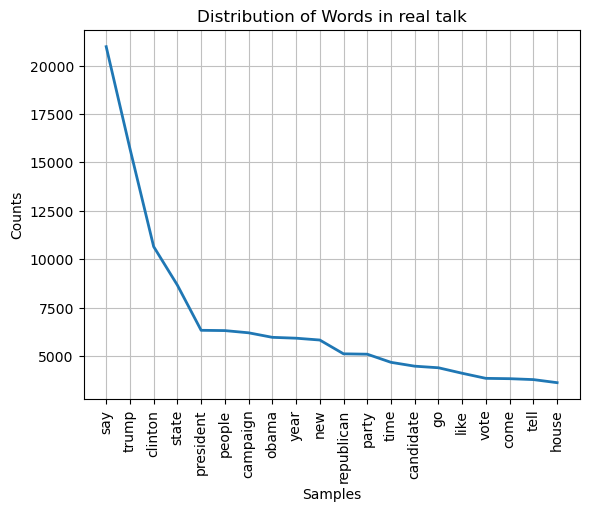

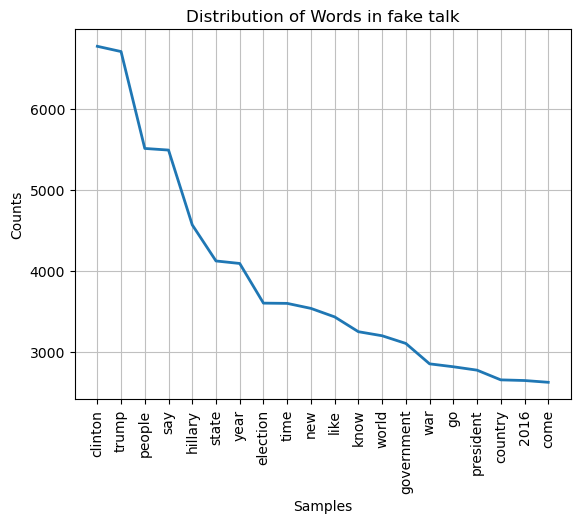

In [19]:
# Plot distribution of words from list
real_dist = FreqDist(exploded_real.to_list())
real_dist.plot(20, title='Distribution of Words in real talk')

fake_dist = FreqDist(exploded_fake.to_list())
fake_dist.plot(20, title='Distribution of Words in fake talk');

In [20]:
from wordcloud import WordCloud

# Make a single giant string with entire group of real talks
real_lemmas = " ".join( df.loc[real_one, 'lemmas-joined'])
# Make a single giant string with entire group of fake talks
fake_lemmas= " ".join( df.loc[fake_one, 'lemmas-joined'])

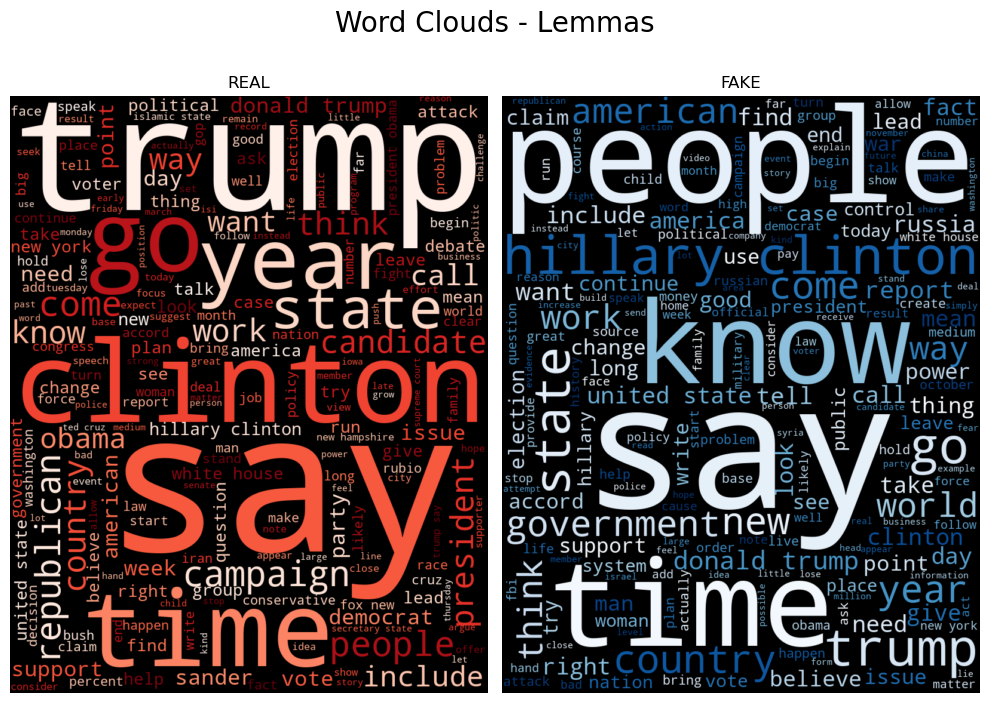

In [21]:
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(real_lemmas)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(fake_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("REAL")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("FAKE")
[ax.axis('off') for ax in axes]
fig.tight_layout()
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

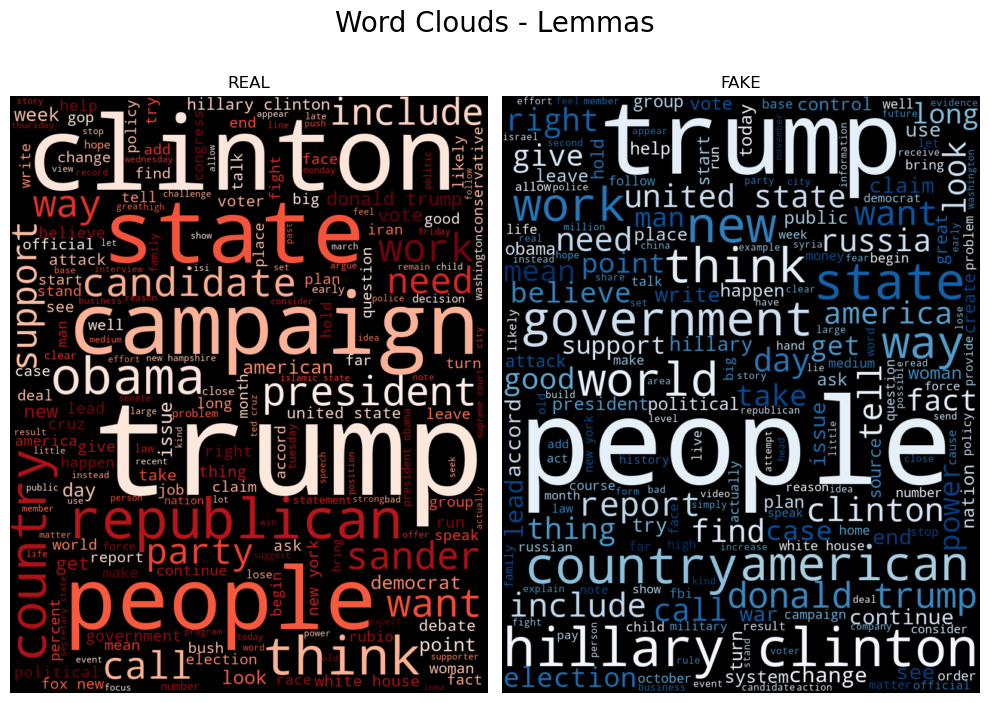

In [23]:
custom_stopwords = ['say', 'go', 'year', 'time', 'like', 'know', 'come']
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,stopwords = custom_stopwords,
                      min_word_length = 2, colormap="Reds",
                     ).generate(real_lemmas)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,stopwords = custom_stopwords,
                       colormap="Blues",
                      ).generate(fake_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("REAL")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("FAKE")
[ax.axis('off') for ax in axes]
fig.tight_layout()
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);